In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets
from sklearn.decomposition import PCA
from IPython.display import Image

# iris dataset

https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html

In [2]:
iris = datasets.load_iris()
df = pd.DataFrame(iris['data'], columns=iris['feature_names'])


In [3]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


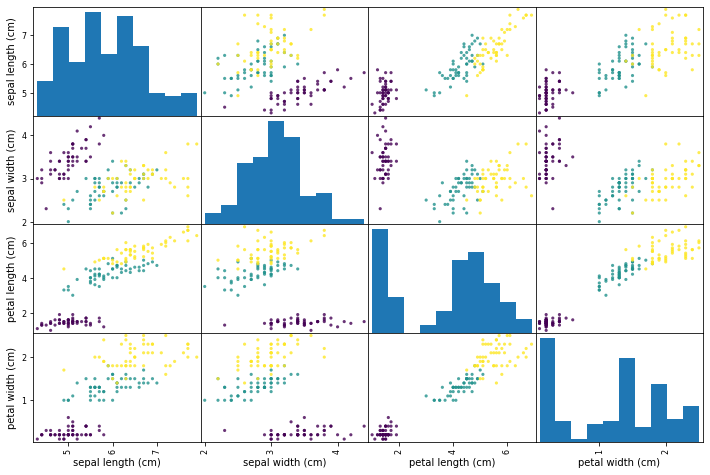

In [4]:
pd.plotting.scatter_matrix(df, c=iris['target'], marker='o', s=10, alpha=.8, figsize=(12, 8))
plt.show()

In [5]:
X = iris.data
Y = iris.target
feature_names = iris.feature_names
target_names = iris.target_names
print(X.shape)
print(Y.shape)

(150, 4)
(150,)


In [6]:
print(target_names)

['setosa' 'versicolor' 'virginica']


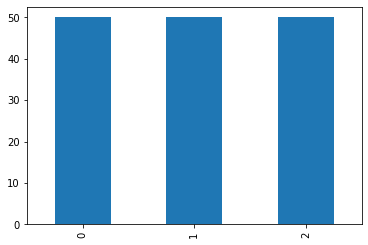

In [7]:
df_X = pd.DataFrame(X)
df_Y = pd.DataFrame(Y)
df_Y[0].value_counts().plot(kind='bar')
plt.show()

c:\users\ameli\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


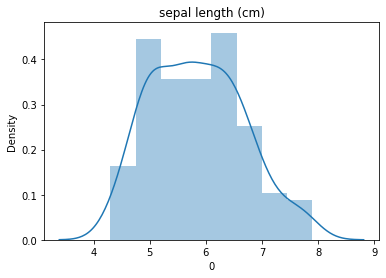

c:\users\ameli\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


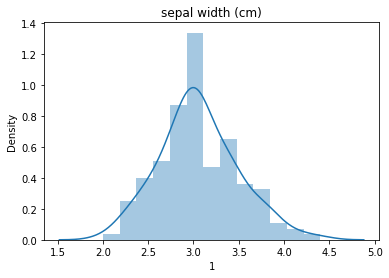

c:\users\ameli\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


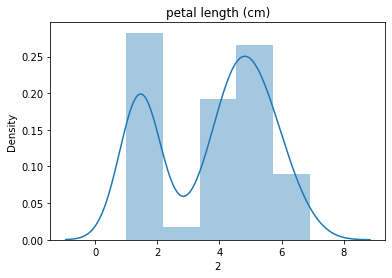

c:\users\ameli\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


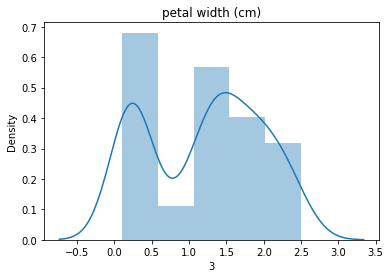

In [8]:
import seaborn as sns
for i in range(df_X.shape[1]):
    sns.distplot(df_X[i])
    plt.title(feature_names[i])
    plt.show()

# PCA

https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

In [9]:
pca = PCA(n_components=2)
pca.fit(X)
PC_score = pca.transform(X)

print(PC_score[:5])
print(PC_score.shape)

[[-2.68412563  0.31939725]
 [-2.71414169 -0.17700123]
 [-2.88899057 -0.14494943]
 [-2.74534286 -0.31829898]
 [-2.72871654  0.32675451]]
(150, 2)


In [10]:
# pca 의 eigen_vector
pca.components_

array([[ 0.36138659, -0.08452251,  0.85667061,  0.3582892 ],
       [ 0.65658877,  0.73016143, -0.17337266, -0.07548102]])

# TODO 1

2차원 데이터가 주어졌을때 이를 scatter 하는 함수를 구현하시오.

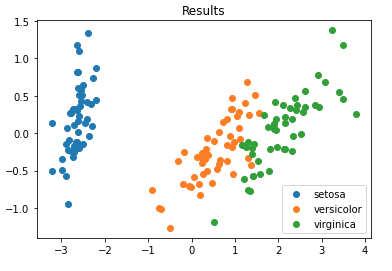

In [11]:
# 아래 그림은 정답 예시
Image("show2D_sample.png")

In [12]:
# Hint
# plt.legend(), plt.title(), plt.scatter() 함수 이용

def show2D(pca_score, Y, target_names):
    plt.figure()
    # TODO -->
    X = np.array(pca_score)
    arr = []
    #print(X[0])
    for i in range(max(Y)+1):
        arr.append([])
    #print(len(Y))
    for i in range(len(Y)):
        arr[Y[i]].append(X[i])
    
    for i in range(max(Y)+1):
        XX = np.array(arr[i])
        plt.scatter(XX[:,0], XX[:,1], s=50, label=target_names[i])
    
    plt.legend()
    plt.title("Results")
    # <--

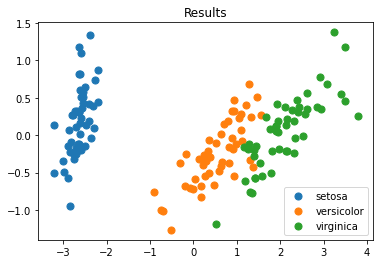

In [13]:
show2D(PC_score, Y, target_names)

# TODO 2

PCA 함수를 구현하시오.

## 요구사항
1. normalize 한 
2. 아래의 numpy 내장 함수 사용 가능
    - ```numpy.mean()```
    - ```numpy.linalg.eig()```
    - ```numpy.dot()```

In [14]:
def student_pca(X, n_components=2):
    pca_results = None
    # TODO -->
    X = np.array(X)
    for i in range(X.shape[1]):
        X[:,i] = X[:,i]-X[:,i].mean()
    cov_norm_X = np.cov(X.T)
    eigenvalue, eigenvector = np.linalg.eig(cov_norm_X)
    
    pca_res = np.dot(X, eigenvector)
    pca_results = pca_res[:,0:n_components]
    
    # <--
    return pca_results

pca_student_score = student_pca(X, n_components=2)
#print(pca_student_score)

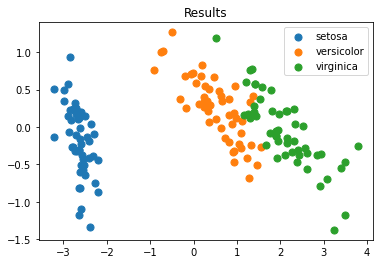

In [15]:
show2D(pca_student_score, Y, target_names)

# TODO 3

digits data 를 이용하여 PCA 결과를 확인하시오.

In [16]:
digits = datasets.load_digits()

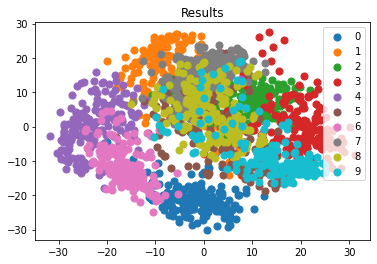

In [17]:
# TODO -->
pca_digits = student_pca(digits["data"], n_components=2)
show2D(pca_digits, digits["target"], digits.target_names)

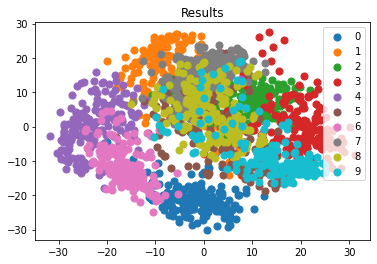

In [18]:
show2D(pca_digits, digits["target"], digits.target_names)

# <--

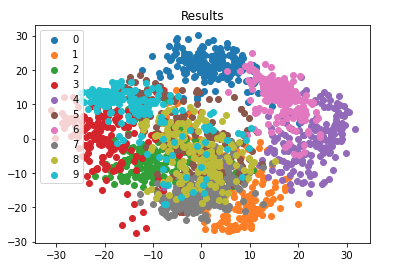

In [19]:
# 예시 정답
Image('digits_sample.png')

# TODO 4

TSNE 를 이용하여 digits 데이터의 결과를 Visualizing 하시오.

c:\users\ameli\appdata\local\programs\python\python39\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
c:\users\ameli\appdata\local\programs\python\python39\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


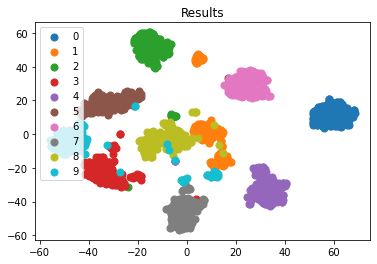

In [20]:
from sklearn.manifold import TSNE

model = TSNE(n_components=2)
digit_model = model.fit_transform(digits["data"])
pca_digits = student_pca(digit_model, n_components=2)
show2D(pca_digits, digits["target"], digits.target_names)

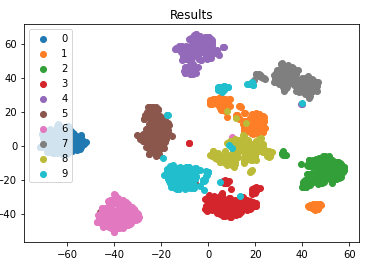

In [21]:
# 예시 정답
Image('tsne_sample.png')

# 과제 : PCA Reconstruction# 과제 : PCA reconstruction

Digits 데이터를 2차원, 3차원, 4차원, 32차원으로 PCA 한 결과를 reconstruction 했을 때 원래 데이터와의 MSE(Mean Square Error) 을 확인 및 복원데이터를 시각화하고 오차율이 다른 이유를 분석하여 보고서를 제출하시오. (코드, 분석내용 첨부)

- 제출형식: {분반}_{학번}_{이름}.zip (ex: 1_20210928_홍길동.zip)
- 제출파일: 보고서({분반}_{학번}_{이름}.pdf), 주피터노트북 파일({분반}_{학번}_{이름}.ipynb)
- 제출기한: 일주일 (사이버캠퍼스 참고)

In [39]:
digits = datasets.load_digits()

In [40]:
X = digits.data
Y = digits.target
feature_names = digits.feature_names
target_names = digits.target_names
n_samples = X.shape[0]
images = X.reshape((n_samples, -1))

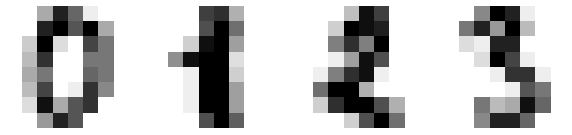

In [41]:
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image in zip(axes, images):
    ax.set_axis_off()
    image = image.reshape(8, 8)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')

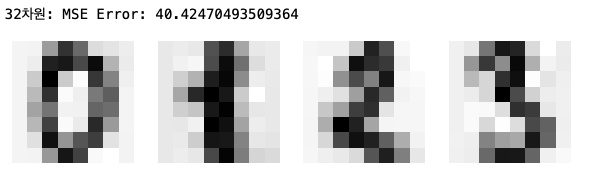

In [42]:
# 예시
Image('assignment_sample.png')

In [43]:
# TODO --> 
n_compo = 32
pca = student_pca(X, n_components=n_compo)

In [44]:
X = np.array(X)
for i in range(X.shape[1]):
    X[:,i] = X[:,i]-X[:,i].mean()

mu = X.mean()
for i in range(X.shape[1]):
    X[:,i] = X[:,i]-X[:,i].mean()
    
cov_norm_X = np.cov(X.T)
eigenvalue, eigenvector = np.linalg.eig(cov_norm_X)

recovers = np.dot(pca, eigenvector[:,:n_compo].T)
recovers += mu

32 차원: MSE Error: 0.6316360146108382


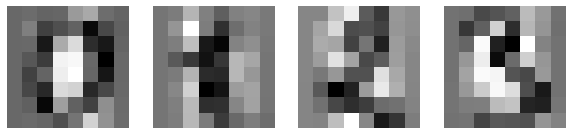

In [45]:
MSE = np.square(np.subtract(X, recovers)).mean()
print(n_compo, "차원: MSE Error:", MSE)

_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, recover in zip(axes, recovers):
    ax.set_axis_off()
    recover = recover.reshape(8, 8)
    ax.imshow(recover, cmap=plt.cm.gray_r, interpolation='nearest')

X = digits.data